In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:

## Initialisation for current project

project_name = ""       # WordData01

data = loadtxt("")      # paramGridWordData01.txt

nF = 5985 # nFeatures
nTE = 1 # nTestedEstimators
nTD = 7 # nTestedDepthMax
nTF = 5 # nTestedFeaturesMax

###################################################

jump = nTD * nTF
corr = data[:,0]
err = data[:,1]
nE = data[:,3].astype(int)
mD = data[:,4].astype(int)
mF = data[:,5].astype(int)
idx = linspace(1,len(corr),len(corr))

## Correlation - maxFeatures

corrMF = []
errMF = []
idxMF = []
for i in range(0,nTF):
    corrMF.append(corr[i::nTF].mean())
    errMF.append(err[i::nTF].mean())
    idxMF.append(mF[i]/nF)

## Correlation - maxDepth

corrMD = [0] * nTD
errMD = [0] * nTD
idxMD = mD[:jump:nTF]

for n in range(0,nTE):
    for i in range(0,nTD):
        corrMD[i] += (corr[ (i*nTF)+(n*jump) : (i*nTF)+(n*jump)+nTF ].mean())
        errMD[i] += (err[ (i*nTF)+(n*jump) : (i*nTF)+(n*jump)+nTF ].mean())


corrMD[:] = [x/nTE for x in corrMD]
errMD[:] = [x/nTE for x in errMD]

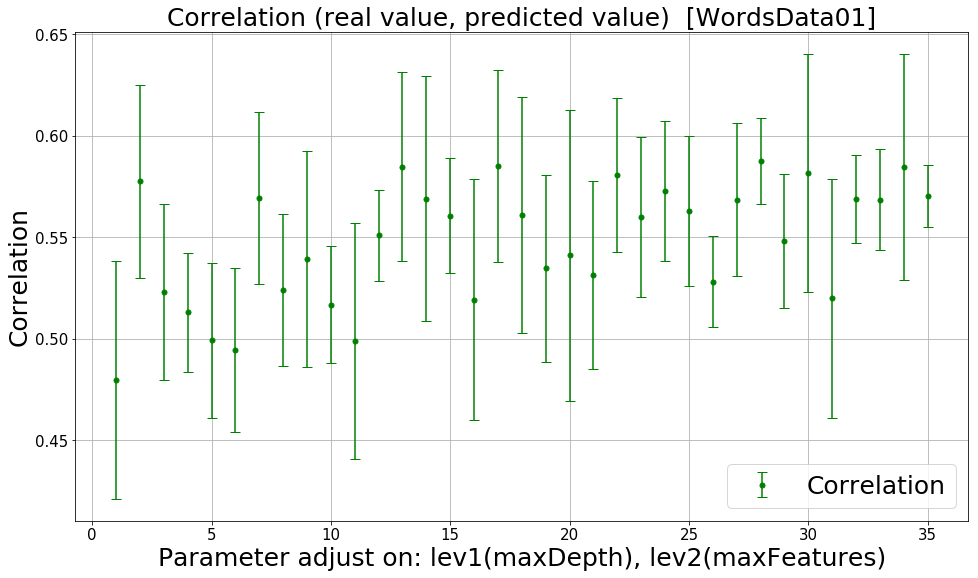

In [24]:

## Correlation (real value, predicted value) with highest nEstimator

figsize(16,9)
errorbar(idx[:jump],corr[-jump:],err[-jump:],label='Correlation',ms=10,marker='.',color='g',capsize=5,ls='')

title('Correlation (real value, predicted value)  [%s]' % (project_name),fontsize=25)
xlabel('Parameter adjust on: lev1(maxDepth), lev2(maxFeatures)',fontsize=25) 
ylabel('Correlation',fontsize=25)
xticks(fontsize=15)
yticks(fontsize=15)
grid(True)
legend(loc='lower right',fontsize=25);

savefig(project_name+"Corr.png",dpi=120)

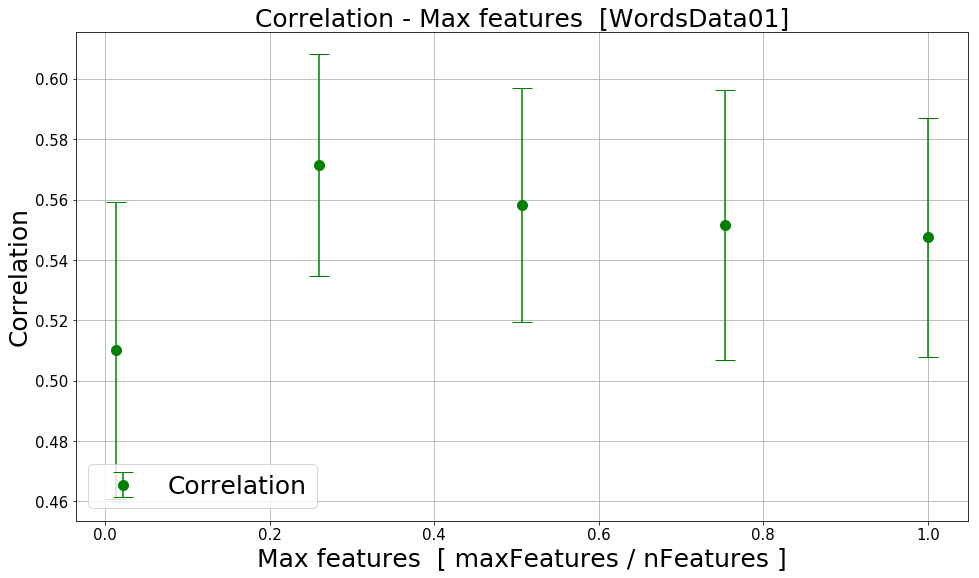

In [25]:

## Correlation - maxFeatures

figsize(16,9)
errorbar(idxMF,corrMF,errMF,label='Correlation',ms=20,marker='.',color='g',capsize=10,ls='')

title('Correlation - Max features  [%s]' % (project_name),fontsize=25)
xlabel('Max features  [ maxFeatures / nFeatures ]',fontsize=25) 
ylabel('Correlation',fontsize=25)
xticks(fontsize=15)
yticks(fontsize=15)
grid(True)
legend(loc='lower left',fontsize=25);

savefig(project_name+"CorrMF.png",dpi=120)

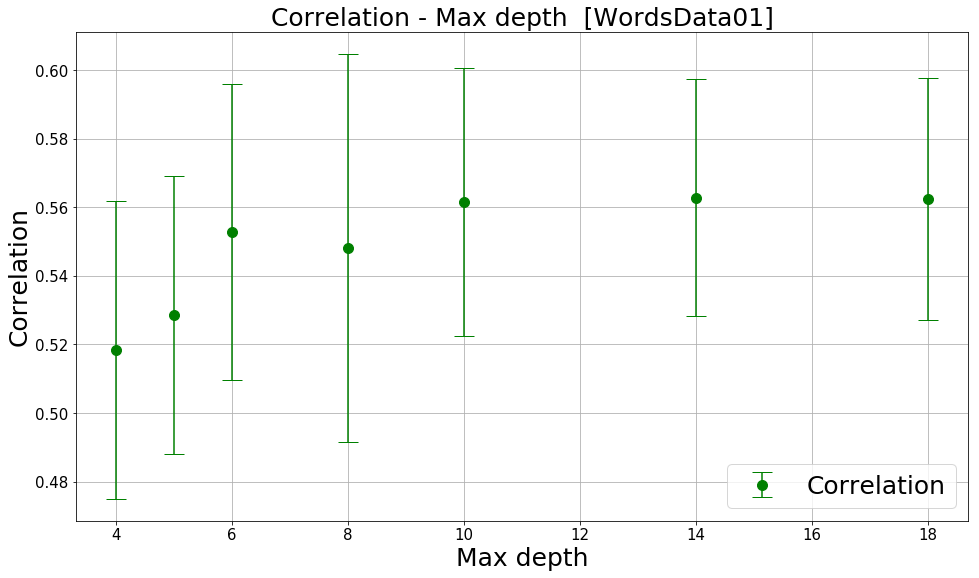

In [26]:

## Correlation - maxDepth

figsize(16,9)
errorbar(idxMD,corrMD,errMD,label='Correlation',ms=20,marker='.',color='g',capsize=10,ls='')

title('Correlation - Max depth  [%s]' % (project_name),fontsize=25)
xlabel('Max depth',fontsize=25) 
ylabel('Correlation',fontsize=25)
xticks(fontsize=15)
yticks(fontsize=15)
grid(True)
legend(loc='lower right',fontsize=25);

savefig(project_name+"CorrMD.png",dpi=120)